<h2>引言</h2>
在进行加密货币的量化研究过程中，我遇到了一些困难。
<ol>
<li>很多量化交易系统专注于股票期货，对于加密货币并不友好，示范策略并没有覆盖多币种</li>
<li>很多离线数据集没有包含最新的一些数据，而一些api则需要付费，我个人暂时没有付费获取数据的意愿</li>
<li>在其他系统的基础上开发必须适配其中的很多数据结构，对我来说并不灵活</li>
</ol>
因而，我决定自己实现一个量化交易系统，并不保证系统能够超过其他的量化系统，但是这个系统会有如下特点。
<ol>
<li>专注于加密货币，如果后期有需要，会加入股票期货等</li>
<li>系统简单，根据需求而添加相应的代码，会有教程展示这个系统的完成过程</li>
</ol>
系统的名称叫做qsq。那么，这篇研究分享主要完成如下内容。
<ol>
<li>在qsq中加入获取CoinMarketCap上的多币种日线数据的模块</li>
<li>在qsq中加入对数据的统计特性进行简单分析的模块</li>
</ol>

<h2>项目地址</h2>
https://github.com/qiushui777/qsq

本文位于qs_papers目录下，建议使用jupter notebook打开学习。

<h2>数据获取</h2>
在qsq目录下，我新建了ScraperQs文件夹，并创建了我的爬虫代码QsCoinMk.py，包含类QsCoinMkScraper。这个类中关键的两个函数如下。

```python 
def get_all_kline_data(self):
    """获取所有在support list 中的代币的数据"""
    for coin in self.support_list:
        self.get_kline_data(cointype=coin)
        time.sleep(1)


def refresh_all_kline_data(self):
    """更新所有在support list中的代币的数据"""
    for coin in self.support_list:
        self.refresh_kline_data(refresh_cointype=coin)
```

事实上，在调用get_all_kline_data函数的时候，可能被网站封掉，所以出错后可以再次调用refresh_all_kline_data来继续下载数据。数据的下载地址在CoreQs文件夹中的QsEny.py中设定。使用数据获取模块的一个示例如下。获取的数据将会存放在C:\Users\<用户名>\qsq\data中。

```python 
from qsq import QsCoinMkScraper

scraper = QsCoinMkScraper()
scraper.get_all_kline_data()
scraper.refresh_all_kline_data()
```

<h2>数据分析</h2>
在qsq中拥有可视化和数据统计的api，要使用它们，我们需要导入QsDrawUtil, QsStat。同时，还需要使用QsDataMarket来将刚刚下载好的数据加载起来。

<h3>数据加载</h3>

In [2]:
# 基础库导入

from __future__ import print_function
from __future__ import division

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import os
import sys
# 使用insert 0即只使用github，避免交叉使用了pip安装的abupy，导致的版本不一致问题
sys.path.insert(0, os.path.abspath('../'))

In [3]:
from qsq import QsData, QsDrawUtil, QsStat

在MarketQs中创建QsDataMarket类，这个类的关键函数是get_coin_df，可以通过这个函数来加载相应的数据集。这里我们先加载5个币种进行简单分析。

In [4]:
qsmarket = QsData()
bitcoin = qsmarket.get_coin_df(coin='bitcoin')
ethereum = qsmarket.get_coin_df(coin='ethereum')
litecoin = qsmarket.get_coin_df(coin='litecoin')
ripple = qsmarket.get_coin_df(coin='ripple')
bitcoin_cash = qsmarket.get_coin_df(coin='bitcoin-cash')

<h3>绘图</h3>

在qsq的UtilQs中创建QsDrawUtil.py，这个是专门用来绘图的。目前支持plot_multi_df函数。需要输入一个值为Dataframe的字典。而且由于不同的币价格不同，为了在绘图中比较它的一个波动性，需要将对应的datafram进行一个缩放。这部分代码则是在QsScaleUtil中实现。

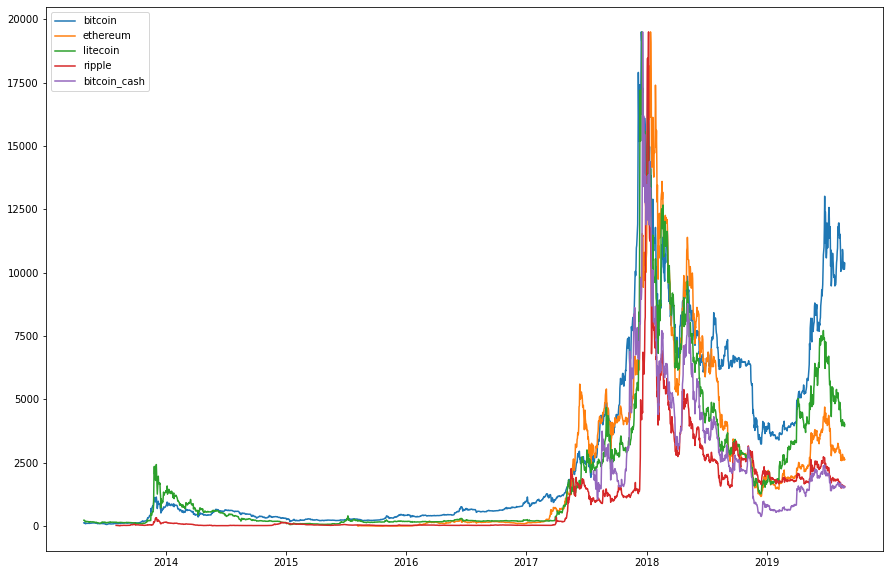

In [7]:
mpl.rcParams['figure.figsize'] = (15,10)
QsDrawUtil.plot_multi_df({'bitcoin':bitcoin,'ethereum':ethereum,'litecoin':litecoin,'ripple':ripple,
                                'bitcoin_cash':bitcoin_cash})

显然，最近两年的走势研究起来比较有趣，这部分波动比较大。

In [8]:
bitcoin_2y = bitcoin[-730:]
ethereum_2y = ethereum[-730:]
litecoin_2y = litecoin[-730:]
ripple_2y = ripple[-730:]
bitcoin_cash_2y = bitcoin_cash[-730:]

<h3>统计特性</h3>

为了分析数据的震荡幅度等，在MarketQs下新建QsStat.py提供专门api。这部分代码基本借鉴于abu量化系统。

我们调用date_week_wave这个api来分析统计交易日震荡幅度。

In [9]:
QsStat.date_week_wave({'bitcoin':bitcoin,'bitcoin_2y':bitcoin_2y,'ethereum':ethereum,'ethereum_2y':ethereum_2y,
                         'litecoin':litecoin,'litecoin_2y':litecoin_2y,'ripple':ripple,'ripple_2y':ripple_2y,
                         'bitcoin_cash':bitcoin_cash,'bitcoin_cash_2y':bitcoin_cash_2y})

,bitcoinwave,bitcoin_2ywave,ethereumwave,ethereum_2ywave,litecoinwave,litecoin_2ywave,ripplewave,ripple_2ywave,bitcoin_cashwave,bitcoin_cash_2ywave
date_week,,,,,,,,,,
周一,5.047973,5.520554,7.999024,6.967290,7.147234,7.746082,6.877837,7.303669,10.048055,8.909550
周二,4.995783,5.568326,8.885082,6.995994,7.082105,8.044266,7.620135,8.351511,10.499552,9.317082
周三,5.091367,5.716225,8.647018,7.269205,7.501152,7.975886,7.264176,8.173670,11.243629,9.976314
周四,5.483723,6.057766,8.695245,7.162547,7.308150,8.000708,8.013337,9.658080,11.151515,10.344703
周五,5.265453,5.648115,8.124267,7.043985,7.392838,8.758334,7.211453,8.819448,11.597110,10.163439
周六,4.448108,4.831158,7.369536,5.666366,6.253722,7.313875,5.996971,5.997121,9.034974,8.165628
周日,4.545802,4.953967,7.310093,6.146260,6.293829,6.953920,6.553537,6.364205,8.965755,8.767079


我们调用p_change_stats这个api获取统计周期内的上涨均值，下跌均值，以及数量，比值

In [10]:
QsStat.p_change_stats({'bitcoin':bitcoin,'bitcoin_2y':bitcoin_2y,'ethereum':ethereum,'ethereum_2y':ethereum_2y,
                         'litecoin':litecoin,'litecoin_2y':litecoin_2y,'ripple':ripple,'ripple_2y':ripple_2y,
                         'bitcoin_cash':bitcoin_cash,'bitcoin_cash_2y':bitcoin_cash_2y})

bitcoin日涨幅平均值2.777, 共1261个交易日上涨走势
bitcoin日跌幅平均值-2.724, 共1046个交易日下跌走势
bitcoin日平均涨跌比1.019, 上涨下跌数量比:1.206

bitcoin_2y日涨幅平均值3.013, 共398个交易日上涨走势
bitcoin_2y日跌幅平均值-3.127, 共332个交易日下跌走势
bitcoin_2y日平均涨跌比0.963, 上涨下跌数量比:1.199

ethereum日涨幅平均值5.081, 共727个交易日上涨走势
ethereum日跌幅平均值-3.866, 共748个交易日下跌走势
ethereum日平均涨跌比1.315, 上涨下跌数量比:0.972

ethereum_2y日涨幅平均值3.833, 共361个交易日上涨走势
ethereum_2y日跌幅平均值-3.628, 共368个交易日下跌走势
ethereum_2y日平均涨跌比1.057, 上涨下跌数量比:0.981

litecoin日涨幅平均值4.493, 共1071个交易日上涨走势
litecoin日跌幅平均值-3.460, 共1158个交易日下跌走势
litecoin日平均涨跌比1.299, 上涨下跌数量比:0.925

litecoin_2y日涨幅平均值4.706, 共351个交易日上涨走势
litecoin_2y日跌幅平均值-3.881, 共379个交易日下跌走势
litecoin_2y日平均涨跌比1.212, 上涨下跌数量比:0.926

ripple日涨幅平均值5.131, 共1017个交易日上涨走势
ripple日跌幅平均值-3.514, 共1190个交易日下跌走势
ripple日平均涨跌比1.460, 上涨下跌数量比:0.855

ripple_2y日涨幅平均值4.812, 共339个交易日上涨走势
ripple_2y日跌幅平均值-3.661, 共390个交易日下跌走势
ripple_2y日平均涨跌比1.314, 上涨下跌数量比:0.869

bitcoin_cash日涨幅平均值6.347, 共347个交易日上涨走势
bitcoin_cash日跌幅平均值-4.691, 共417个交易日下跌走势
bitcoin_cash日平均涨跌比1.353, 上涨下跌数量比:0.832

bitcoin_cash_2y日涨幅平

继续调用wave_change_rate这个api，判断币种的日振幅和涨跌幅之比，如阿布所言，这个比值对于美股在1.8以上就认为具有套利条件。

In [11]:
QsStat.wave_change_rate({'bitcoin_2y':bitcoin_2y,'ethereum_2y':ethereum_2y,'ripple_2y':ripple_2y,
                           'litecoin_2y':litecoin_2y,'bitcoin_cash_2y':bitcoin_cash_2y})

bitcoin_2y日振幅涨跌幅比：1.784864, 不具备日统计套利条件
ethereum_2y日振幅涨跌幅比：1.812396, 具备日统计套利条件
ripple_2y日振幅涨跌幅比：1.862999, 具备日统计套利条件
litecoin_2y日振幅涨跌幅比：1.829557, 具备日统计套利条件
bitcoin_cash_2y日振幅涨跌幅比：1.844508, 具备日统计套利条件


QsStat中还有很多的api，使用者可以根据需要调用。

<h2>总结</h2>
本文简单介绍了qsq中数据获取、绘图、统计特征的相关代码，并做了简单的示例。这篇简单研究的优缺点如下。<br>
优点：
<ol>
<li>可以获取多币种日线数据</li>
<li>系统简单</li>
</ol>
缺点：
<ol>
<li>获取的数据不够全面，并不支持高频数据</li>
<li>相关api仍然不够全面</li>
</ol>

<h2>后期研究</h2>
后面我会继续开发qsq，增加回测模块，完成一个检测策略的回测。